# Jupyter Data Science Workflow Example


In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from urllib.request import urlretrieve

import pandas as pd
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [7]:
urlretrieve(URL, 'bike_count.csv')

('bike_count.csv', <http.client.HTTPMessage at 0x280a4a2d788>)

In [28]:
df = pd.read_csv('bike_count.csv', index_col='Date', parse_dates=True)

df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [30]:
df.columns = ['Total', 'East', 'West']

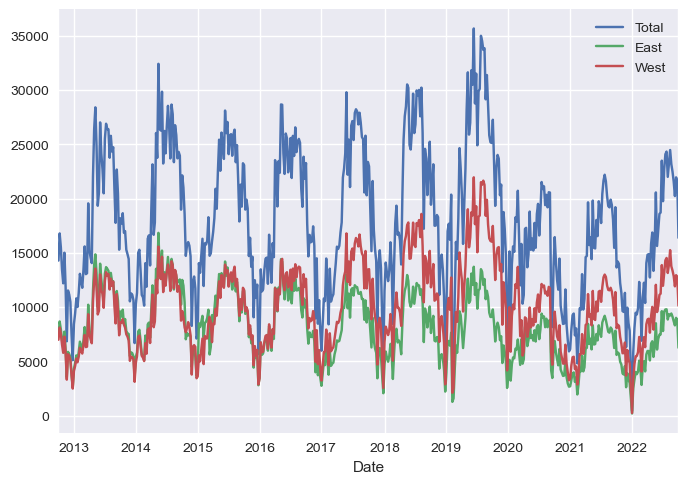

In [31]:
df.resample('W').sum().plot();

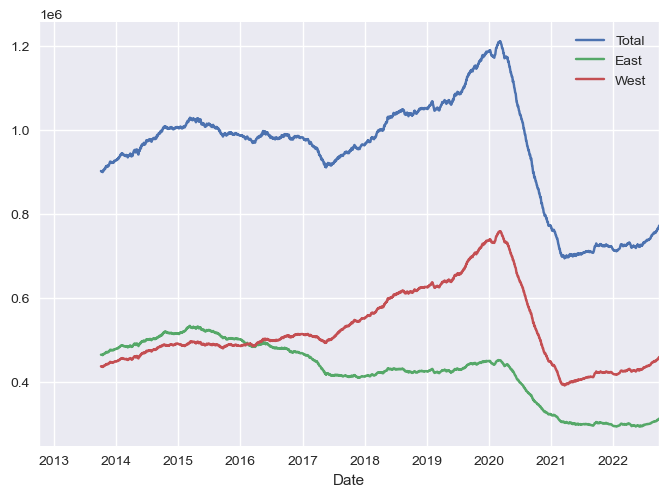

In [32]:
df.resample('D').sum().rolling(365).sum().plot();

<AxesSubplot:xlabel='time'>

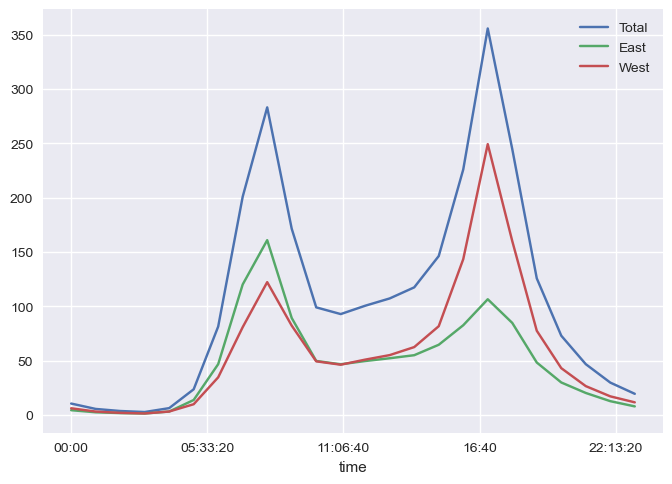

In [33]:
df.groupby(df.index.time).mean().plot()

In [35]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


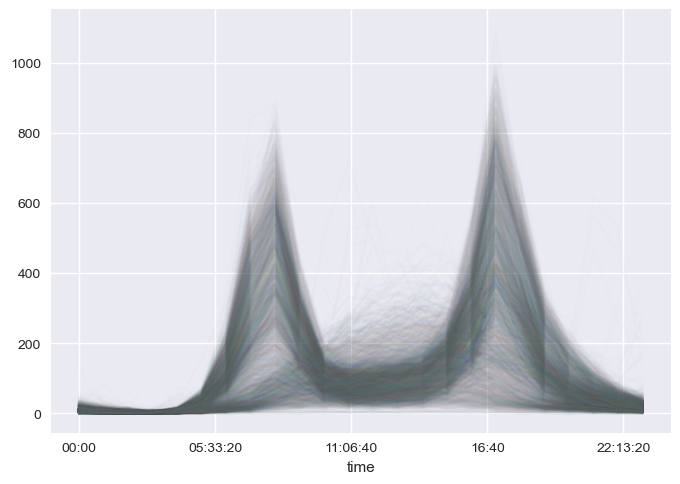

In [37]:
 pivoted.plot(legend=False, alpha=0.01);